In [2]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from hyperparams import STRATEGY
from PLP.DSL import *
from strategy_demonstrations import make_modified_env
from decision_tree_imitation_learning import solve_mouselab
from scipy import stats
from datetime import datetime

import read_csv_to_dataframe as ecf
import experiment_participant_analysis as epa
from importlib import reload

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 60)

In [2]:
# import data as csv
exp_version = '2'
dataclip = pd.read_csv('data/Exp'+exp_version+'/dataclip.csv')


In [4]:
#set up
reload(ecf)
dataframe1 = ecf.makeDataframe(dataclip, ecf.getParticipantInfoExp2)
dataframe1 = dataframe1.sort_values(by=['condition'], ascending=True)
dataframe1.reset_index(inplace = True, drop=True)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
# ............................ ANONYMIZE AND Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [7]:
data = dataframe1.drop(columns=['WorkerId', 'hitId', 'assignmentId','datastring'])
data.apply(lambda x: (json.dumps(a) for a in x) if x.name in 'testingTrials' else x).to_csv('data/Exp'+exp_version+'/dataframe_raw.csv', index_label='pid')



In [8]:
# ............................ CALCULATE PAIR AGREEMENT .....................................................
# ..........................................................................................
# ..........................................................................................

In [3]:
exp_version = '2'
plp_tree = 'lambda st, act : ((among(st, act, lambda st, act:  is_root(st, act)  and  not(is_observed(st, act)) )))'

dataframe2 = pd.read_csv('data/Exp'+exp_version+'/dataframe_raw.csv')
dataframe2 = dataframe2.apply(lambda x: (json.loads(a) for a in x) if x.name in 'testingTrials' else x)

if(True):
    pas = epa.get_agreement_sample(dataframe2.testingTrials, plp_tree)
    dataframe2['pa_mean'] = pas['click_agreement_means_sample']
    dataframe2['pa_complete'] = pas['click_agreement_ratios_sample']
    dataframe2['pa_et'] = pas['mean_run_lengths_sample']
else:
    pas = pd.read_csv('data/Exp'+exp_version+'/dataframe_complete.csv')
    dataframe2['pa_mean'] = pas['pa_mean']
    dataframe2['pa_complete'] = pas['pa_complete']
    dataframe2['pa_et'] = pas['pa_et']

163
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


In [10]:
#dataframe2

In [11]:
# ............................ ANONYMIZE AND Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [12]:
data = dataframe2.drop(columns=['testingTrials'])
data.to_csv('data/Exp'+exp_version+'/dataframe_complete.csv', index=False)

In [13]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [14]:
dataframe1['pa_mean'] = dataframe2['pa_mean']
df_valid_all = dataframe1[dataframe1.status != 6]
df_valid_all.reset_index(inplace = True, drop=True)
print(len(df_valid_all))

159


In [15]:
# ............................BONUS.................................................
# ..........................................................................................
# ..........................................................................................

In [16]:
#df_valid_all

In [17]:
bon = []
for index, row in df_valid_all.iterrows():
    if row['condition'] == 0:
        bon.append(row['pa_mean'] * 0.5)
    else: 
        bon.append(max(0, min(0.5,np.sum(row['scores']) * 0.02) ))
        
df_valid_all['bonus'] = bon

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.30830345911949686
0.0
0.5


(array([19.,  7.,  6., 15., 15., 20., 11.,  3.,  2., 61.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

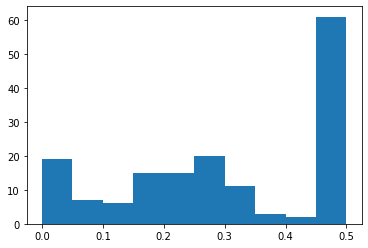

In [18]:
# bonus stats:
print(np.mean(df_valid_all['bonus']))
print(np.min(df_valid_all['bonus']))
print(np.max(df_valid_all['bonus']))
plt.hist(df_valid_all.bonus)

In [19]:
ecf.exportBonus(df_valid_all, total_bonus = False, exp_version= exp_version)

In [20]:
df_valid_all.totalTime.mean()

11.766037735849059

In [25]:
dataframe1[dataframe1.index == 31].testingTrials.tolist()

[[{'stateRewards': ['', -5, 5, 10, -5, -10, -5, -10, 5, -5, 10, 10, 10],
   'prs': {'left': -5, 'up': -25, 'right': 0},
   'trial_id': 95,
   'block': 'testing',
   'trialIndex': 3,
   'score': 7,
   'expectedScore': 7,
   'expectedRewards': 15,
   'simulationMode': [None, None, None],
   'rewards': [-5, 10, 10],
   'path': ['0', '9', '10', '12'],
   'rt': [192269, 636, 1767],
   'delays': [],
   'actions': ['right', 'up', 'right'],
   'actionTimes': [192291, 193426, 195692],
   'queries': {'preselect': {'state': {'target': [], 'time': []},
     'clickable': {'target': [], 'time': []}},
    'click': {'state': {'target': ['1', '9', '6', '5', '10', '2', '11', '12'],
      'time': [42196, 50298, 83465, 114044, 117327, 133326, 149747, 177182]},
     'edge': {'target': [], 'time': []},
     'clickable': {'target': [True, True, True, True, True, False, True, True],
      'time': [42197, 50300, 83468, 114046, 117329, 133327, 149750, 177183]}},
    'flowchart': {'index': {'target': [], 'time':

In [29]:
dataframe2[dataframe2.pid == 31].pa_complete.tolist()

[[0.889, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]